<br/>

<img src="https://uploads-ssl.webflow.com/614b1fe22fa8b90ef41aeffe/6265cb48f9496b1cefc9ab75_logotipo-mbit-39.png" width="200px" align="right" CLASS="TextWrap" style="background-color:#2a3f3f;">

<h1><font color="#2a3f3f" size=5>Proyecto de consolidación 6</font></h1>

<br/>
<div style="text-align: right">
<font color="#2a3f3f" size=3>Javier Cózar - javier.cozar@mbitschool.com</font><br>
<font color="#2a3f3f" size=3>Visualización de datos geoespaciales</font><br>
</div>


# Descripción

En este proyecto vamos a crear una aplicación de streamlit que incluya un mapa interactivo creado con `folium`. Trabajaremos con los datos de pisos de AirBnb en Madrid, y crearemos una aplicación que nos permitirá visualizar pisos en Madrid de acuerdo a una serie de filtros en streamlit.

## AirBnb en Madrid

El csv `data/pisos.csv` contiene información sobre pisos disponibles en Madrid a través de la plataforma *AirBnb*. Los datos han sido obtenidos de [kaggle](https://www.kaggle.com/datasets/rusiano/madrid-airbnb-data) y procesados posteriormente. Como puede observarse, para cada piso se proporciona, además de su precio y tipo, la localización (latitud,longitud) en coordenadas WGS84 (GPS).

En el conjunto de datos `data/neighbourhoods.geojson` (obtenido también de [kaggle](https://www.kaggle.com/datasets/rusiano/madrid-airbnb-data)) se almacena información sobre los distintos barrios de Madrid.

In [1]:
# En primer lugar importa las dependencias
import pandas as pd
import geopandas as gpd
import folium
import streamlit as st

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

1. En primer lugar vamos a cargar el csv y el geojson.

Realizo una pequeña exploración de los datos para ver qué me voy a encontrar

In [3]:
# Cargo los archivos
df_barrios = gpd.read_file('C:/Users/34610/Desktop/Master/1-Semestre/Proyecto_6/data/neighbourhoods.geojson')
df_pisos = pd.read_csv('C:/Users/34610/Desktop/Master/1-Semestre/Proyecto_6/data/pisos.csv')

In [4]:
# df_barrios.info()

In [5]:
# df_barrios.neighbourhood.unique()

In [6]:
# df_barrios.head()

In [7]:
# df_pisos.info()

In [8]:
# df_pisos.head()

2. Ahora vamos a crear una columna llamada `coord` en el dataframe de habitaciones de AirBnb

In [9]:
# Creo una nueva columna llamada 'coord' mediante la latitud y la longitud
df_pisos['coord'] = gpd.points_from_xy(
    x=df_pisos.longitude, y=df_pisos.latitude
)
# Ahora convierto el DataFrame en un GeoDataframe para obtener datos del tipo 'geometry' en la columna 'coord'
df_pisos = gpd.GeoDataFrame(df_pisos, geometry='coord')

In [10]:
# Compruebo que la columna 'coord' es del tipo 'geometry'
#df_pisos.info()

3. Crea un mapa en folium, donde inicialmente se visualice Madrid (por completo), y se vean los barrios de madrid (utiliza el `geojson` para ello).

<Axes: >

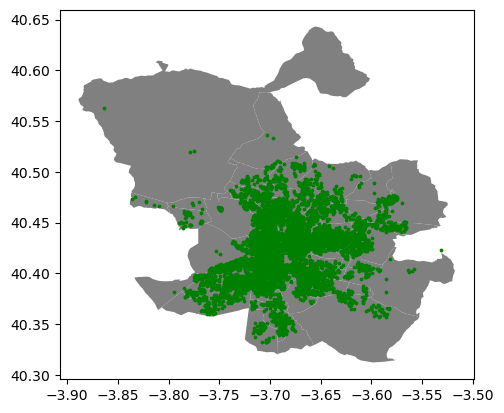

In [11]:
# Primero creo una variable 'ax' que contenga un mapa de los barrios con fondo gris
ax = df_barrios.plot(color='gray')
# Añado las cóordenadas del DataFrame que contiene los pisos al anterior mapa para que se súperponga
df_pisos.plot(color='green', ax=ax, markersize=3)

4. Nos interesa ver la distribución de pisos por el barrio de **Sol**. Para poder saber a qué barrio pertenece cada piso,  usa la función `contains` del MULTIPOLYGON que representa el barrio con el punto que representa el piso. Después filtra las filas para quedarte con los pisos únicamente de Sol.

In [12]:
# Filtro el DataFrame de barrios para obtener los valores de las filas que se identifiquen con la columna "'neighbourhood' == 'Sol'".
# Luego, mediante la función lambda recorro el DataFrame y devuelva "'neighbourhood' == 'Sol'".
# Una vez realizado el filtro selecciono la columna 'geometry' y obtengo la información
sol_geom = df_barrios.loc[lambda df:df.neighbourhood == 'Sol'].iloc[0].geometry

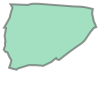

In [13]:
sol_geom

In [14]:
# Compruebo que tipo de objeto es
type(sol_geom)

shapely.geometry.multipolygon.MultiPolygon

In [15]:
# Obtengo todas las coordenadas que conforman el polígono que delimita la zona de 'Sol'
sol_geom.wkt

'MULTIPOLYGON (((-3.704747 40.42027, -3.701501 40.420023, -3.701148 40.420015, -3.70071 40.419993, -3.700266 40.419926, -3.699582 40.41977, -3.699577 40.419769, -3.699642 40.419303, -3.699483 40.418542, -3.699217 40.417911, -3.699465 40.417813, -3.699796 40.417428, -3.700338 40.416622, -3.700474 40.416451, -3.700672 40.416281, -3.70087 40.416133, -3.701117 40.415965, -3.701267 40.415866, -3.701924 40.415393, -3.702453 40.414986, -3.703027 40.414531, -3.703178 40.414565, -3.703271 40.414611, -3.703344 40.414713, -3.703837 40.414318, -3.70464 40.413936, -3.704734 40.413918, -3.704824 40.413947, -3.705471 40.413994, -3.706179 40.41399, -3.707301 40.413638, -3.707387 40.413529, -3.707634 40.413587, -3.708168 40.413727, -3.708025 40.414121, -3.707941 40.414533, -3.708097 40.414755, -3.708341 40.415297, -3.708391 40.415329, -3.708457 40.415331, -3.708518 40.415337, -3.708721 40.415591, -3.708627 40.41586, -3.708576 40.41599, -3.708605 40.416302, -3.708533 40.416386, -3.708564 40.416499, -3.7

In [16]:
# Mediante esta función añado una columna 'is_in_sol' para verificar que cada piso 'g' se encuentra dentro de dicha geometría ('sol_geom').
# El motivo es comprobar que siempre obtengo el valor booleano 'True' que verifica que los pisos están en la zona delimitada por mi polígono ('sol_geom').
df_pisos_sol = (
    df_pisos
    .assign(
        is_in_sol=lambda df: df.geometry.map(lambda g: sol_geom.contains(g))
    )
    # Esta última línea sirve para quedarme solo con las filas con valores de 'True' en la columna 'is_in_sol'
    .loc[lambda df:df.is_in_sol]
)

<Axes: >

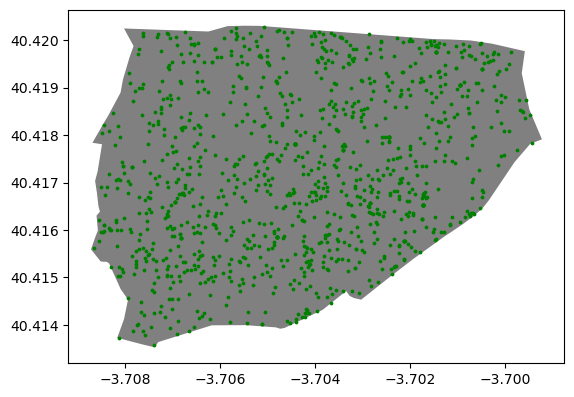

In [17]:
# Repito la acción anterior de súperponer un mapa sobre otro que me permite visualizar un mapa con la información seleccionada de ambos DataFrames.
ax = df_barrios.loc[lambda df: df.neighbourhood == 'Sol'].plot(color='gray')
df_pisos_sol.plot(ax=ax, color='green', markersize=3)

5. Vamos a crear una nueva columna indicando con texto una categoría para el precio de las habitaciones en el dataframe de habitaciones de AirBnb.

- 0-50: Muy baratos
- 50-100: Baratos
- 100-200: Precio medio
- 200-1000: Caros
- 1000-10000: Muy caros

A continuación crea una layer por cada categoría y añade marcadores a cada layer correspondientes a las habitaciones de su categoría.

In [18]:
# Primero defino las categorías y sus rangos mediante un diccionario.
categorias = {
    'Muy barato':(0, 50),
    'Barato': (50, 100),
    'Precio medio': (100, 200),
    'Caro': (200, 1000),
    'Muy caro': (1000, 10000)
}

In [19]:
# Defino una función con el parámetro 'precio' y genero un bucle que itere por todas las filas y añada la categoría a la que pertenece cada vivienda en función de en qué rango de precio se encuentre.
def sensacion(precio):
    for categoria, (min_price, max_price) in categorias.items():
        if min_price <= precio < max_price:
            return categoria

In [20]:
# Añado una nueva columna que introduzca el valor que corresponda según el precio
df_pisos_sol['price_sensation'] = df_pisos_sol['price'].apply(sensacion)

In [21]:
# Compruebo que lo he hecho bien
df_pisos_sol.head(2)

,id,room_type,price,latitude,longitude,coord,is_in_sol,price_sensation
6,30320,Entire home/apt,65,40.41476,-3.70418,POINT (-3.70418 40.41476),True,Barato
59,217674,Entire home/apt,101,40.41538,-3.70741,POINT (-3.70741 40.41538),True,Precio medio


6. Ahora vamos a mostrar en folium todos los pisos en el barrio de Sol. Vamos a agrupar cada uno de los pisos en un `FeatureGroup` que se corresponda con la categoría de los pisos, es decir, 5 grupos. ¡De esta manera podremos mostrarlos y ocultarlos a nuestro antojo!

In [22]:
# Identifico las coordenadas de Sol en google maps y las guardo en una variable 'puerta_sol'
# Creo el mapa en folium y le indico el punto central que debe mostrar, el zoom y el tamaño
puerta_sol = [40.41711891959671, -3.703583017644129]
mapa = folium.Map(location=puerta_sol, zoom_start=10, width=800, height=500)
mapa

In [23]:
# Agrupo los pisos porel valor de la columna 'price_sensation' del DataFrame 'df_pisos_sol'
# Creo las capas de las categorías definidas y genero un bucle que itere por todas las filas que busque las concordancias con la capa seleccionada en cada momento.
# Para finalizar creo un marcador en el mapa de cada piso que cumpla las concordancias
for categoria, data in df_pisos_sol.groupby('price_sensation'):
    layer = folium.FeatureGroup(name=categoria)
    for _, row in data.iterrows():
        folium.Marker(location=[row['latitude'], row['longitude']], popup=row['price_sensation']).add_to(layer)
    layer.add_to(mapa)

In [24]:
# Agrego el control de capas al mapa
folium.LayerControl().add_to(mapa)

In [25]:
mapa

7. Construye una aplicación en **streamlit** que contenga:
    1. Una zona de filtros en el sidebar (lateral izquierdo) que permita:
        1. Seleccionar un barrio de interés (de todos los disponibles, es decir, no filtres por `sol`)
        2. Tipo de habitación (posibles valores de la columna `room_type`)
    2. La zona principal mostrará el mapa donde, para el barrio y el tipo de habitación seleccionado, muestre un mapa como el realizado en el ejercicio anterior.
  
**Nota**: si quieres acelerar la aplicación, construye el dataframe necesario en el notebook y guarda el dataframe como un fichero (por ejemplo en formato parquet). Después leelo desde la aplicación de streamlit y genera el mapa con él, así evitarás tener que realizar todos los cálculos en la propia aplicación, lo que incrementa el tiempo de inicio de la misma.

In [26]:
# Ordeno alfabéticamente por barrio para la futura lista desplegable en streamlit
df_barrios = df_barrios.sort_values(by='neighbourhood')

In [27]:
# Anteriormente ya definí la función 'sensation'
df_pisos['price_sensation'] = df_pisos['price'].apply(sensacion)

In [28]:
df_pisos.head()

,id,room_type,price,latitude,longitude,coord,price_sensation
0,6369,Private room,60,40.45724,-3.67688,POINT (-3.67688 40.45724),Barato
1,21853,Private room,31,40.40381,-3.74130,POINT (-3.74130 40.40381),Muy barato
2,23001,Entire home/apt,50,40.38840,-3.69511,POINT (-3.69511 40.38840),Barato
3,24805,Entire home/apt,92,40.42183,-3.70529,POINT (-3.70529 40.42183),Barato
4,26825,Private room,26,40.38975,-3.69018,POINT (-3.69018 40.38975),Muy barato


Los siguientes códigos están comentados porque dan error al no tener una versión de GEOS 3.10.0 o superior.

Más adelante cntinuo con la libreta salvando este error pero sin resolverlo directamente

In [29]:
# Guardo el 'df_pisos' y el 'df_barrios' en formato parquet
# df_pisos.to_parquet('C:/Users/34610/Desktop/Master/1-Semestre/Proyecto_6/data/pisos.parquet')
# df_barrios.to_parquet('C:/Users/34610/Desktop/Master/1-Semestre/Proyecto_6/data/barrios.parquet')

In [30]:
# Compruebo que se carga bien la columna 'coord' con tipo 'geometry'
# pisos = gpd.read_parquet('C:/Users/34610/Desktop/Master/1-Semestre/Proyecto_6/data/pisos.parquet')
# pisos.info()

In [31]:
# Compruebo que se carga bien la columna 'coord' con tipo 'geometry'
# barrios = gpd.read_parquet('C:/Users/34610/Desktop/Master/1-Semestre/Proyecto_6/data/barrios.parquet')
# barrios.info()

Obtengo un error al ejecutar las celdas anteriores para guardar tipos de datos 'geometry' en formato parquet.

Dejo aquí el enlace desde el que se puede descargar GEOS 3.12.0:

    -('https://libgeos.org/usage/download/')

Solvento el problema redefiniendo el tipo de dato en la columna con datos geométricos

Cambio el tipo de formato de la columna 'coord' y 'geometry' de los dos DataFrames

In [32]:
df_pisos = (
    df_pisos
    .assign(
        coord=lambda df:df.geometry.to_wkt()
    )
)

C:\Users\34610\anaconda3\Lib\site-packages\pandas\core\frame.py:5012: UserWarning: Geometry column does not contain geometry.
  data[k] = com.apply_if_callable(v, data)


In [33]:
df_barrios = (
    df_barrios
    .assign(
        geometry=lambda df:df.geometry.to_wkt()
    )
)

C:\Users\34610\anaconda3\Lib\site-packages\pandas\core\frame.py:5012: UserWarning: Geometry column does not contain geometry.
  data[k] = com.apply_if_callable(v, data)


In [34]:
# Guardo el 'df_pisos' y el 'df_barrios' en formato parquet
df_pisos.to_parquet('C:/Users/34610/Desktop/Master/1-Semestre/Proyecto_6/data/pisos.parquet')
df_barrios.to_parquet('C:/Users/34610/Desktop/Master/1-Semestre/Proyecto_6/data/barrios.parquet')

Ahora al cargarlo de nuevo hay que cambiarle el formato de las columnas 'coord' y 'geometry'

Realizo el ejemplo en uno de los dos DataFrames

In [35]:
pisos = pd.read_parquet('C:/Users/34610/Desktop/Master/1-Semestre/Proyecto_6/data/pisos.parquet')
pisos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19618 entries, 0 to 19617
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               19618 non-null  int64  
 1   room_type        19618 non-null  object 
 2   price            19618 non-null  int64  
 3   latitude         19618 non-null  float64
 4   longitude        19618 non-null  float64
 5   coord            19618 non-null  object 
 6   price_sensation  19618 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 1.0+ MB


In [36]:
# Realizo la transformación inversa de la columna 'coord'
pisos = (
    pisos
    .assign(
        coord=lambda df: gpd.GeoSeries.from_wkt(pisos.coord)
    )
)

In [37]:
# Compruevo la conversión del tipo de dato a 'geometry' en la columna 'coord'
pisos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19618 entries, 0 to 19617
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   id               19618 non-null  int64   
 1   room_type        19618 non-null  object  
 2   price            19618 non-null  int64   
 3   latitude         19618 non-null  float64 
 4   longitude        19618 non-null  float64 
 5   coord            19618 non-null  geometry
 6   price_sensation  19618 non-null  object  
dtypes: float64(2), geometry(1), int64(2), object(2)
memory usage: 1.0+ MB


In [40]:
barrios = pd.read_parquet('C:/Users/34610/Desktop/Master/1-Semestre/Proyecto_6/data/barrios.parquet')
barrios.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128 entries, 74 to 80
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   neighbourhood        128 non-null    object
 1   neighbourhood_group  128 non-null    object
 2   geometry             128 non-null    object
dtypes: object(3)
memory usage: 4.0+ KB


In [41]:
# Realizo la transformación inversa de la columna 'coord'
barrios = (
    barrios
    .assign(
        geometry=lambda df: gpd.GeoSeries.from_wkt(barrios.geometry)
    )
)

In [42]:
barrios.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128 entries, 74 to 80
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   neighbourhood        128 non-null    object  
 1   neighbourhood_group  128 non-null    object  
 2   geometry             128 non-null    geometry
dtypes: geometry(1), object(2)
memory usage: 4.0+ KB
